<a href="https://colab.research.google.com/github/Nohgyumin0812/FactorAnalysis/blob/main/factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
from google.colab import drive
import numpy as np
import itertools
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
df = pd.read_csv('/content/drive/MyDrive/factor_analysis.csv', header=[0, 1])
company_list = list(df.columns.levels[0])
print(company_list)
company_list.remove('Name')
date_column = df['Name']['Date']
company_num = df.shape[0]
df.iloc[:, 1:] = df.iloc[:, 1:].replace({'적전': -1}, regex=True).replace({'적지': -1}, regex=True).replace({'흑전': 1}, regex=True)
df.iloc[:, 1:] = df.iloc[:, 1:].replace({',': ''}, regex=True)
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)


<ipython-input-54-70845f9ecf1c>:1: DtypeWarning: Columns (2,3,4,5,6,7,10,11,12,13,14,15,17,18,19,20,21,22,23,24,26,27,28,29,30,31,34,35,36,37,38,39,42,43,44,45,46,47,50,51,52,53,54,55,58,59,60,61,62,63,66,67,68,69,70,71,74,75,76,77,78,79,82,83,84,85,86,87,90,91,92,93,94,95,98,99,100,101,102,103,106,107,108,109,110,111,114,115,116,117,118,119,122,123,124,125,126,127,130,131,132,133,134,135,138,139,140,141,142,143,146,147,148,149,150,151,154,155,156,157,158,159,162,163,164,165,166,167,170,171,172,173,174,175,177,178,179,180,181,182,183,184,186,187,188,189,190,191,194,195,196,197,198,199,202,203,204,205,206,207,210,211,212,213,214,215,217,218,219,220,221,222,223,224,226,227,228,229,230,231,234,235,236,237,238,239,242,243,244,245,246,247,250,251,252,253,254,255,258,259,260,261,262,263,266,267,268,269,270,271,273,274,275,276,277,278,279,280,282,283,284,285,286,287,290,291,292,293,294,295,298,299,300,301,302,303,306,307,308,309,310,311,314,315,316,317,318,319,322,323,324,325,326,327,330,331,

Symbol  A005930                                           \
            Name     삼성전자                삼성전자.1             삼성전자.2   
0           Date  수정주가(원)  PER (E3, 12M Fwd)(배)  ROE(영업이익) (E3)(%)   
1     2021-01-01   81,000               15.3285              17.34   
2     2021-01-02   81,000               15.3285              17.34   
3     2021-01-03   81,000               15.3285              17.34   
4     2021-01-04   83,000                15.651              17.37   
...          ...      ...                   ...                ...   
1096  2024-01-01   78,500                17.919               2.11   
1097  2024-01-02   79,600               18.1012               2.12   
1098  2024-01-03   77,000               17.5099               2.12   
1099  2024-01-04   76,600               17.2088               2.13   
1100  2024-01-05   76,600               17.0018               2.15   

                                                                        \
               삼성전자.3                삼성전자.4        삼성전자.5       삼성전자.6   
0     EPS 증가율 (E3)(%)  Payout Ratio (E3)(%)  수익률 (3개월)(%)  변동성 (W,1Yr)   
1                 NaN                   NaN         39.18      0.32915   
2                 NaN                   NaN         39.18      0.32915   
3                 NaN                   NaN         39.18      0.32915   
4                 NaN                   NaN         42.61      0.32994   
...               ...                   ...           ...          ...   
1096           -80.51                 99.91         14.77      0.19321   
1097           -80.24                 98.65         16.37      0.18718   
1098           -80.24                 98.65         12.57      0.18718   
1099           -79.97                 97.38         13.48      0.18718   
1100           -79.36                 93.79         14.84      0.18718   

                                  A000660  ...      A003780  \
                          삼성전자.7   SK하이닉스  ...       진양산업.6   
0     시가총액 (티커-상장예정주식수 미포함)(백만원)  수정주가(원)  ...  변동성 (W,1Yr)   
1                    483,552,387  118,500  ...      0.63386   
2                    483,552,387  118,500  ...      0.63386   
3                    483,552,387  118,500  ...      0.63386   
4                    495,491,952  126,000  ...      0.62967   
...                          ...      ...  ...          ...   
1096                 468,627,930  141,500  ...      0.26752   
1097                 475,194,691  142,400  ...       0.2674   
1098                 459,673,256  136,800  ...       0.2674   
1099                 457,285,343  136,400  ...       0.2674   
1100                 457,285,343  137,500  ...       0.2674   

                                  A129920                        \
                          진양산업.7    대성하이텍               대성하이텍.1   
0     시가총액 (티커-상장예정주식수 미포함)(백만원)  수정주가(원)  PER (E3, 12M Fwd)(배)   
1                         65,780      NaN                   NaN   
2                         65,780      NaN                   NaN   
3                         65,780      NaN                   NaN   
4                         64,740      NaN                   NaN   
...                          ...      ...                   ...   
1096                      89,440    6,510               31.8868   
1097                      88,660    6,550               32.0827   
1098                      86,710    6,410               31.3969   
1099                      85,280    6,520               31.9357   
1100                      84,370    6,500               31.8378   

                                                                              \
                대성하이텍.2          대성하이텍.3               대성하이텍.4       대성하이텍.5   
0     ROE(영업이익) (E3)(%)  EPS 증가율 (E3)(%)  Payout Ratio (E3)(%)  수익률 (3개월)(%)   
1                   NaN              NaN                   NaN           NaN   
2                   NaN              NaN                   NaN           NaN   
3                   NaN              NaN    

In [3]:
new_columns= {}
for company in company_list:
  df.loc[:, (company, '수정주가(원)')] =  df.loc[:, (company, '수정주가(원)')].pct_change(5)

  try: # p/e, 시총같이 역수가 더 투자적합한 것
    df.loc[:, (company, 'PER (E3, 12M Fwd)(배)')] = 1 / df.loc[:, (company, 'PER (E3, 12M Fwd)(배)')]
    df.loc[:, (company, '시가총액 (티커-상장예정주식수 미포함)(백만원)')] = 1 / df.loc[:, (company, '시가총액 (티커-상장예정주식수 미포함)(백만원)')]
    df.loc[:, (company, '변동성 (W,1Yr)')] = 1 / df.loc[:, (company, '변동성 (W,1Yr)')]
  except:
    pass
  df[(company,'날짜')]= date_column
df = df.stack(level=0).reset_index()
df = df.drop(columns = 'Date').reset_index(drop=True)
df

<ipython-input-3-86d8cf7f7e5c>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(company,'날짜')]= date_column


,level_0,level_1,EPS 증가율 (E3)(%),"PER (E3, 12M Fwd)(배)",Payout Ratio (E3)(%),ROE(영업이익) (E3)(%),날짜,"변동성 (W,1Yr)",수익률 (3개월)(%),수정주가(원),시가총액 (티커-상장예정주식수 미포함)(백만원)
0,0,3S,NaN,NaN,NaN,NaN,2021-01-01,1.768503,2.12,NaN,1.030960e-05
1,0,AJ네트웍스,NaN,NaN,NaN,NaN,2021-01-01,1.279034,42.22,NaN,4.627809e-06
2,0,AK홀딩스,NaN,NaN,NaN,NaN,2021-01-01,1.669867,43.30,NaN,3.001417e-06
3,0,APS,NaN,NaN,NaN,NaN,2021-01-01,1.258020,-4.42,NaN,5.972396e-06
4,0,AP시스템,NaN,0.095578,NaN,NaN,2021-01-01,2.358546,12.70,NaN,2.779059e-06
...,...,...,...,...,...,...,...,...,...,...,...
1740195,1099,휴젤,88.27,0.054168,NaN,14.13,2024-01-05,2.630679,17.86,0.060241,5.097214e-07
1740196,1099,흥구석유,NaN,NaN,NaN,NaN,2024-01-05,1.063208,52.26,0.180000,7.062147e-06
1740197,1099,흥국화재,NaN,NaN,NaN,NaN,2024-01-05,3.794922,-2.91,-0.022801,5.188660e-06
1740198,1099,흥아해운,NaN,NaN,NaN,NaN,2024-01-05,1.377657,89.49,0.140000,1.459404e-06


In [4]:
new_columns_name = ['level_0', 'level_1', 'EPS_chg','E/P','Div', 'ROE', '날짜', '1/Vol','Momentum_3mo','수익률', 'Market_cap']
df.columns = new_columns_name

stack_condition = df['날짜'] == date_column.tolist()[-1]
factor_stack = df.loc[stack_condition]
factor_stack.to_excel('/content/drive/MyDrive/factor_stack.xlsx')

In [5]:
condition_Market_cap = df['Market_cap']> 1/300000  #시가총액 3000억이상
df.loc[condition_Market_cap, 'Market_cap'] = np.nan


condition_vol = df['1/Vol'] == np.inf
df.loc[condition_vol, '1/Vol'] = np.nan
condition_vol11 = df['수익률'] < 0.00000001
df.loc[condition_vol11, '1/Vol'] = np.nan

df = df[~df['level_1'].str.contains('스팩')]
df = df[df['날짜'] > '2023-01-01'].reset_index(drop = True)
df

,level_0,level_1,EPS_chg,E/P,Div,ROE,날짜,1/Vol,Momentum_3mo,수익률,Market_cap
0,731,3S,NaN,NaN,NaN,NaN,2023-01-02,NaN,-8.80,-0.066975,NaN
1,731,AJ네트웍스,11.30,0.170853,27.91,22.67,2023-01-02,NaN,-15.88,-0.001745,NaN
2,731,AK홀딩스,NaN,NaN,NaN,NaN,2023-01-02,NaN,22.64,-0.063401,NaN
3,731,APS,60.00,0.053309,12.75,-3.48,2023-01-02,NaN,64.13,-0.087613,3.247249e-06
4,731,AP시스템,-11.40,0.247543,4.99,24.66,2023-01-02,NaN,11.95,-0.040431,NaN
...,...,...,...,...,...,...,...,...,...,...,...
583015,1099,휴젤,88.27,0.054168,NaN,14.13,2024-01-05,2.630679,17.86,0.060241,5.097214e-07
583016,1099,흥구석유,NaN,NaN,NaN,NaN,2024-01-05,1.063208,52.26,0.180000,NaN
583017,1099,흥국화재,NaN,NaN,NaN,NaN,2024-01-05,NaN,-2.91,-0.022801,NaN
583018,1099,흥아해운,NaN,NaN,NaN,NaN,2024-01-05,1.377657,89.49,0.140000,1.459404e-06


In [6]:
portfolio = {'Date' : {}, 'Factor' : '', 'cum_ret' : 1, 'weekly_ret': 0 , 'long_holdings' : {}, 'short_holdings' : {}}
cum_return = []
weekly_return = []
date_column = df['날짜'].unique().tolist()

def get_top_bottom_factor(factor, date, select_num):
  condition = df['날짜'] == date
  factor_filtered_df = df.loc[condition]
  factor_today = factor_filtered_df.loc[:, ('level_1',factor)]
  top = factor_today.nlargest(select_num, factor)['level_1'].tolist()
  bottom =  factor_today.nsmallest(select_num, factor)['level_1'].tolist()

  return top, bottom

def buy_sell(date,next_date, top, bottom, select_num, factor, cum_return):

  portfolio['long_holdings'] = {}
  portfolio['short_holdings'] = {}

  condition = df['날짜'] == next_date
  price_filtered_df = df.loc[condition]
  for company in top:
    condition_2 = price_filtered_df['level_1'] == company
    portfolio['Date'] = next_date
    portfolio['long_holdings'][company] = price_filtered_df.loc[condition_2]['수익률'].tolist()[0]

  for company in bottom:
    condition_2 = price_filtered_df['level_1'] == company
    portfolio['Date'] = next_date
    portfolio['short_holdings'][company] = price_filtered_df.loc[condition_2]['수익률'].tolist()[0]

  portfolio['weekly_ret'] = round((sum(portfolio['long_holdings'].values()) / select_num - sum(portfolio['short_holdings'].values()) / select_num), 3)
  if portfolio['Date'] == date_column[5] :
    portfolio['cum_ret'] = 100
  portfolio['cum_ret'] *= (1 + portfolio['weekly_ret'])
  portfolio['cum_ret'] = round(portfolio['cum_ret'], 3)
  cum_return.append(portfolio['cum_ret'])
  weekly_return.append(portfolio['weekly_ret'])
  portfolio['Factor'] = factor
  return cum_return, weekly_return, portfolio



In [7]:
dates = date_column[::5]
figure_dic_cum = {}
figure_dic_weekly = {}


factor_lst = [ 'EPS_chg','E/P','Div', 'ROE', '1/Vol','Momentum_3mo', 'Market_cap']
for factor in factor_lst:
  cum_return = []
  weekly_return = []
  for i in range(0, len(dates) -1):
    select_num = 10
    date = dates[i]
    next_date = dates[i+1]
    top, bottom = get_top_bottom_factor(factor, date, select_num)
    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)

    print(portfolio)

  name_cum = '%s_cum' % factor
  name_weekly = '%s_weekly' % factor
  figure_dic_cum[name_cum] = cum_return
  figure_dic_weekly[name_weekly] = weekly_return


figure_dic_cum['Date'] = pd.to_datetime(dates[1:])
figure_df_cum = pd.DataFrame(figure_dic_cum).set_index('Date')
figure_dic_weekly['Date'] = pd.to_datetime(dates[1:])
figure_df_weekly = pd.DataFrame(figure_dic_weekly).set_index('Date')

{'Date': '2023-01-07', 'Factor': 'EPS_chg', 'cum_ret': 98.8, 'weekly_ret': -0.012, 'long_holdings': {'아이씨디': 0.02497162315550505, '자화전자': 0.06265060240963849, '데브시스터즈': -0.001769911504424737, '카카오페이': 0.16573556797020483, '디이엔티': -0.004154645124062273, '토비스': 0.01148225469728592, '세코닉스': -0.001865671641791078, 'RFHIC': -0.009049773755656076, '두산퓨얼셀': 0.03614457831325302, '롯데케미칼': 0.017094017094017033}, 'short_holdings': {'HMM': 0.028423772609819098, '에이플러스에셋': 0.0010582010582009804, '텔레칩스': 0.04977375565610864, '에스디바이오센서': 0.07167832167832167, '이마트': 0.07067510548523215, '지씨셀': 0.02516411378555805, '한진칼': 0.0014005602240896309, 'HB솔루션': 0.01624959376015589, '카카오': 0.08538899430740043, '한글과컴퓨터': 0.07499999999999996}}
{'Date': '2023-01-12', 'Factor': 'EPS_chg', 'cum_ret': 102.159, 'weekly_ret': 0.034, 'long_holdings': {'아이씨디': 0.008859357696566983, '세코닉스': 0.08598130841121487, '자화전자': 0.07029478458049887, '카카오페이': 0.08146964856230032, '디이엔티': 0.04693475489627996, 'HD한국조선해양': 0.0270270270

In [8]:
# 특정 지표 백테스팅
"""
factor = '1/Vol'
cum_return = []
weekly_return = []
for i in range(0, len(dates) -1):
    select_num = 10
    date = dates[i]
    next_date = dates[i+1]
    top, bottom = get_top_bottom_factor(factor, date, select_num)
    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)
    print(portfolio)

dates = date_column[::5].to_list()
new_figure_dic_cum = {}
new_figure_dic_weekly = {}

new_name_cum = '%s_cum' % factor
new_name_weekly = '%s_weekly' % factor
new_figure_dic_cum[new_name_cum] = cum_return
new_figure_dic_weekly[new_name_weekly] = weekly_return"""


"\nfactor = '1/Vol'\ncum_return = []\nweekly_return = []\nfor i in range(0, len(dates) -1):\n    select_num = 10\n    date = dates[i]\n    next_date = dates[i+1]\n    top, bottom = get_top_bottom_factor(factor, date, select_num)\n    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)\n    print(portfolio)\n\ndates = date_column[::5].to_list()\nnew_figure_dic_cum = {}\nnew_figure_dic_weekly = {}\n\nnew_name_cum = '%s_cum' % factor\nnew_name_weekly = '%s_weekly' % factor\nnew_figure_dic_cum[new_name_cum] = cum_return\nnew_figure_dic_weekly[new_name_weekly] = weekly_return"

<Axes: xlabel='Date'>

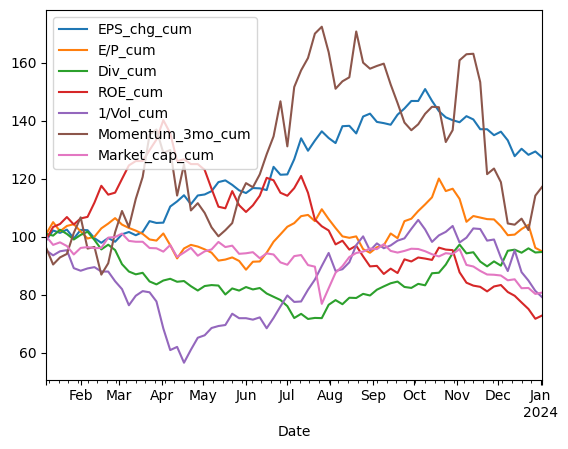

In [9]:
figure_df_cum.plot()

<ipython-input-10-641cadef8cc2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr1_weekly[new_name_weekly] = (1 + yr1_weekly[new_name_weekly]).cumprod()


            EPS_chg_weekly  E/P_weekly  Div_weekly  ROE_weekly  1/Vol_weekly  \
Date                                                                           
2023-12-18        1.020000    1.019000    0.989000    0.971000      0.921000   
2023-12-23        1.003680    1.033266    1.004824    0.942841      0.890607   
2023-12-28        1.012713    0.954738    0.989752    0.900413      0.853202   
2024-01-02        0.996510    0.942326    0.991731    0.914820      0.830165   

            Momentum_3mo_weekly  Market_cap_weekly  
Date                                                
2023-12-18             1.020000           0.964000  
2023-12-23             0.982260           0.964964  
2023-12-28             1.096202           0.940840  
2024-01-02             1.125800           0.946485  
Axes(0.125,0.11;0.775x0.77)


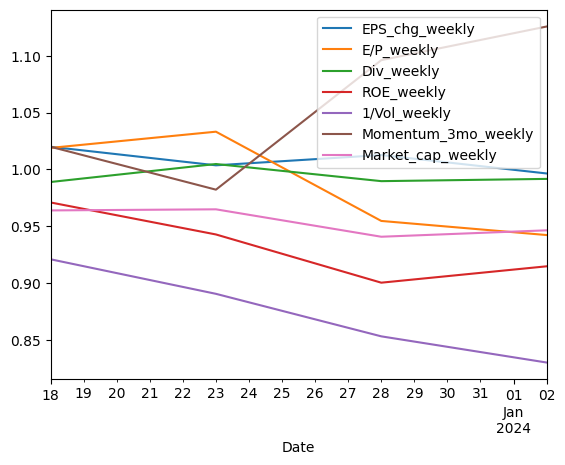

In [10]:
yr1_weekly = figure_df_weekly.iloc[-4:, ]
for factor in factor_lst:
  new_name_weekly = '%s_weekly' % factor
  yr1_weekly[new_name_weekly] = (1 + yr1_weekly[new_name_weekly]).cumprod()

print(yr1_weekly)
print(yr1_weekly.plot())

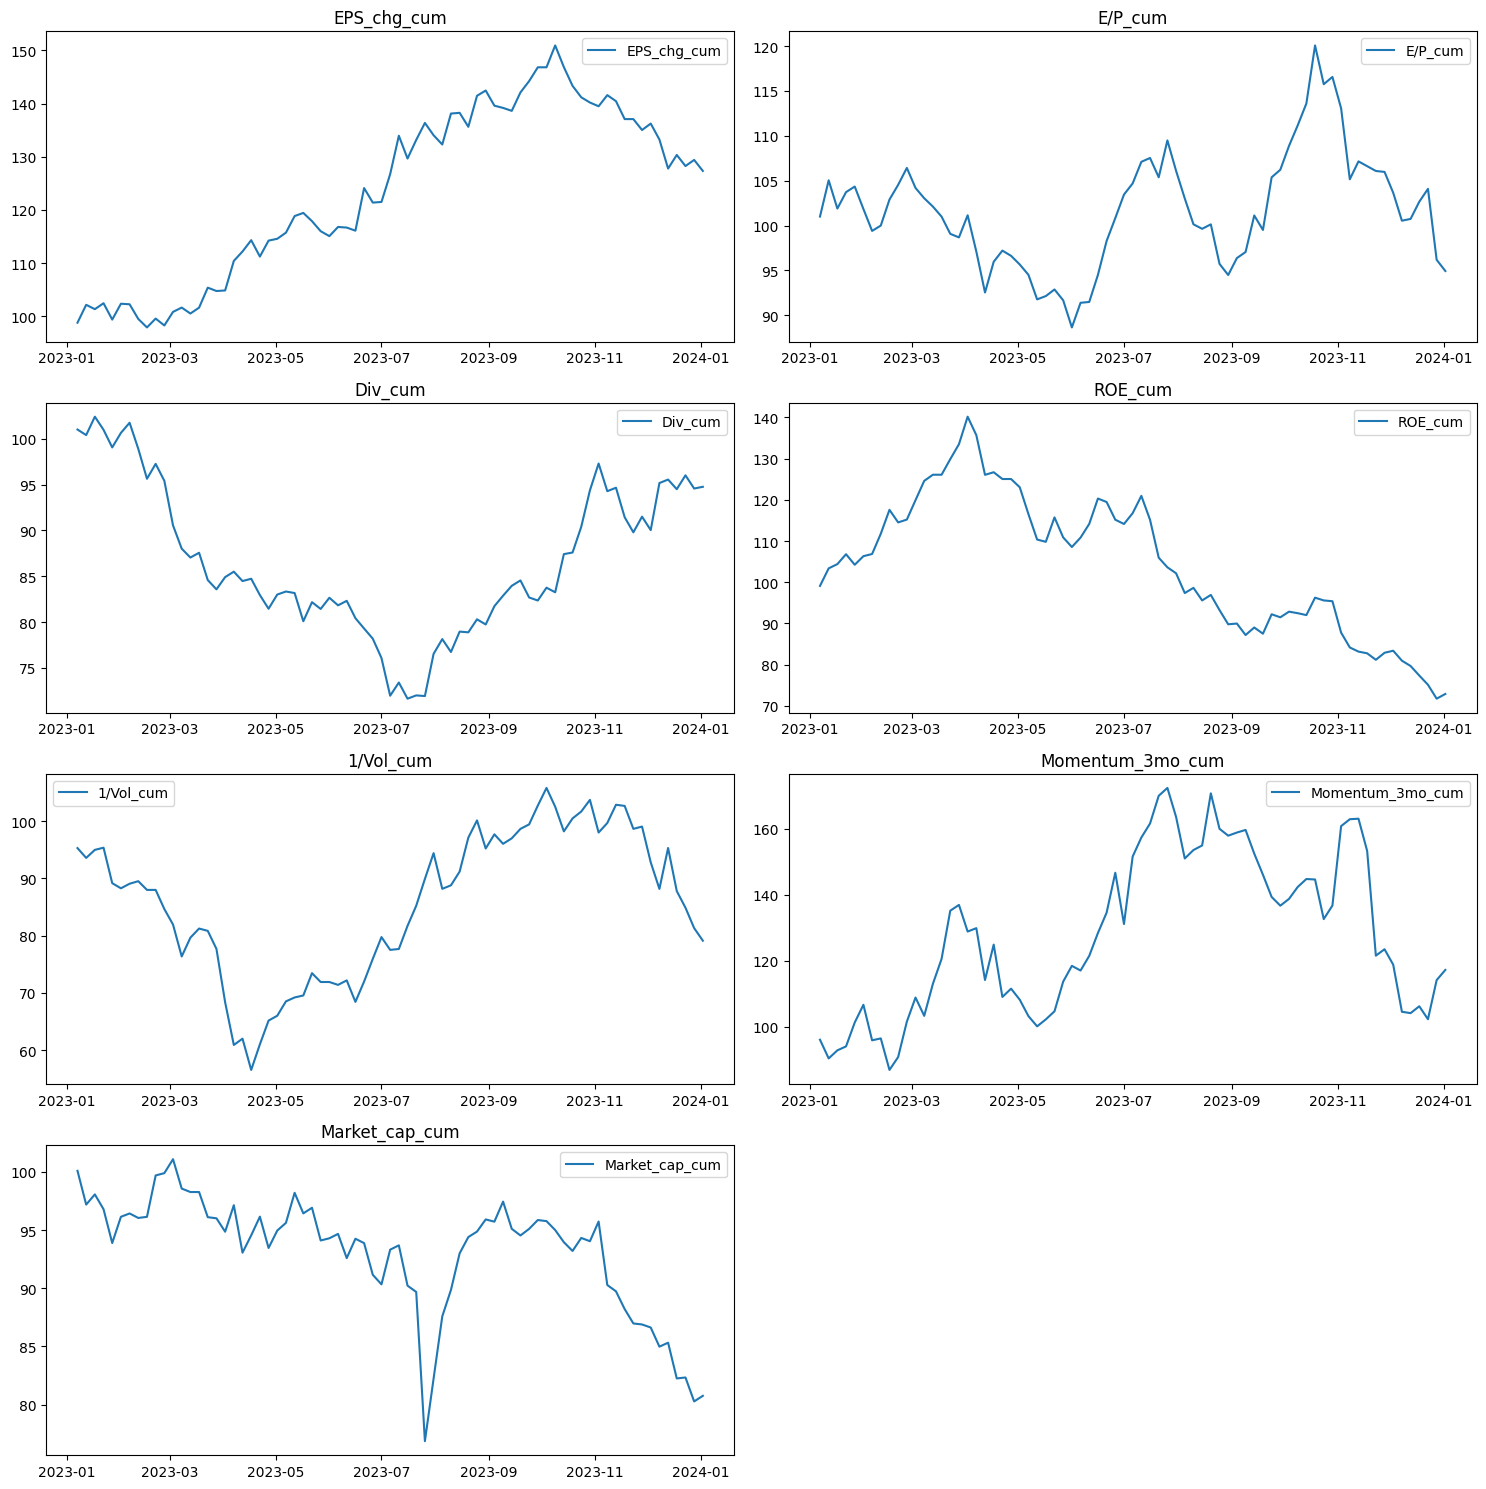

In [11]:
# 최근 1년 성과
import matplotlib.pyplot as plt

# yr1_weekly 데이터프레임에서 각 열에 대한 서브플롯 생성
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# 데이터프레임의 열에 대해 순회하며 서브플롯에 선 그래프 플로팅 (총 7개의 서브플롯)
for i, column in enumerate(figure_df_cum.columns[:7]):
    row, col = divmod(i, 2)
    axes[row, col].plot(figure_df_cum.index, figure_df_cum[column], label=column)
    axes[row, col].set_title(column)
    axes[row, col].legend()

# 남은 서브플롯 비우기
for i in range(7, 8):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [67]:
Mp_stock = factor_stack.drop('level_0', axis = 1).reset_index(drop = True).dropna()

Mp_stock['score'] = Mp_stock['EPS_chg'].rank(ascending = True) * 0.5 + Mp_stock['E/P'].rank(ascending = True) * 0.2 + Mp_stock['Momentum_3mo'].rank(ascending = True) * 0.3
Mp_stock = Mp_stock.sort_values('score', ascending = False).reset_index(drop = True).reset_index()[['level_1', 'EPS_chg', 'Momentum_3mo', 'E/P', 'index']]
Mp_stock.rename(columns = {'level_1':'Name', 'EPS_chg': 'Growth', 'Momentum_3mo':'Momentum', 'E/P':'Value', 'index':'rank'},inplace= True)
Mp_stock['rank'] = Mp_stock['rank']+1
Mp_long = Mp_stock.head(10)
Mp_short = Mp_stock.tail(10)
Model_Portfolio = pd.concat([Mp_long, Mp_short]).reset_index(drop= True)
Model_Portfolio

,Name,Growth,Momentum,Value,rank
0,HDC현대산업개발,220.65,42.99,0.226665,1
1,우신시스템,445.34,24.64,0.218924,2
2,서연이화,169.42,12.79,0.366757,3
3,SNT홀딩스,86.73,14.77,0.330918,4
4,태경케미컬,125.54,21.34,0.147295,5
5,한화에어로스페이스,347.54,32.83,0.074875,6
6,현대지에프홀딩스,1017.50,1.90,0.347476,7
7,대웅,68.97,21.59,0.174889,8
8,효성중공업,1398.28,4.83,0.164644,9
9,기아,76.08,9.70,0.252029,10


,Name,Growth,Momentum,Value,rank
343,이수페타시스,-49.91,0.18,0.054812,344
344,뷰웍스,-45.55,-13.19,0.105640,345
345,서흥,-60.86,-0.53,0.069124,346
346,테스,-89.52,3.66,0.063294,347
347,제이스텍,-87.87,-0.44,0.089817,348
348,DI동일,-91.79,6.73,0.028198,349
349,삼천리,-63.46,0.32,0.051101,350
350,국도화학,-68.18,-20.50,0.161080,351
351,비나텍,-66.14,-1.07,0.032312,352
352,SK네트웍스,-63.62,-4.41,0.064419,353


In [13]:
!pip install finance-datareader
!pip install yfinance
import yfinance as yf
import FinanceDataReader as fdr

up_down_label = ['하락', '약간 하락', '약간 상승', '상승']
kospi = pd.DataFrame(fdr.DataReader('KS11', '2022-12-01')['Close'])
dollar = pd.DataFrame(fdr.DataReader('USD/KRW', '2022-12-01')['Close'])
tbondrate = pd.DataFrame(yf.download('^TNX',  '2022-12-01')['Adj Close'])

macro_list = ['kospi', 'dollar', 'tbondrate']
macro_df = kospi.merge(dollar, left_index= True, right_index = True).merge(tbondrate, left_index = True, right_index = True)

macro_df = macro_df.pct_change(5)
macro_df.columns = macro_list
factor_sys = pd.DataFrame()

for columns in macro_df.columns:
  macro_df[columns] = pd.qcut(macro_df[columns], q=4, labels= up_down_label)
  macro_df[columns] = macro_df[columns].shift(1)

factor_sys = figure_df_weekly.merge(macro_df, left_index = True, right_index = True )
print(factor_sys.head())

[*********************100%%**********************]  1 of 1 completed
            EPS_chg_weekly  E/P_weekly  Div_weekly  ROE_weekly  1/Vol_weekly  \
Date                                                                           
2023-01-12           0.034       0.040      -0.006       0.043        -0.018   
2023-01-17          -0.008      -0.030       0.020       0.010         0.015   
2023-01-27          -0.030       0.006      -0.019      -0.024        -0.065   
2023-02-01           0.030      -0.024       0.016       0.020        -0.010   
2023-02-06          -0.001      -0.024       0.011       0.005         0.009   

            Momentum_3mo_weekly  Market_cap_weekly  kospi dollar tbondrate  
Date                                                                        
2023-01-12               -0.059             -0.029     상승     하락        하락  
2023-01-17                0.027              0.009     상승     하락     약간 하락  
2023-01-27                0.077             -0.030     상승  약간 

In [14]:
"""for macro in macro_list:
  for factor in factor_lst:
    for up_down in up_down_label:
      factor_name = "%s_weekly" %(factor)
      condition_sys = factor_sys[macro]==up_down
      mean = round(factor_sys[condition_sys][factor_name].mean(),3)
      print('사용된 팩터', factor,'/ 사용된 매크로:', macro, '/ 국면 :', up_down, "/ 평균 사후수익률:", round(mean * 100,2), "%")"""

'for macro in macro_list:\n  for factor in factor_lst:\n    for up_down in up_down_label:\n      factor_name = "%s_weekly" %(factor)\n      condition_sys = factor_sys[macro]==up_down\n      mean = round(factor_sys[condition_sys][factor_name].mean(),3)\n      print(\'사용된 팩터\', factor,\'/ 사용된 매크로:\', macro, \'/ 국면 :\', up_down, "/ 평균 사후수익률:", round(mean * 100,2), "%")'

In [15]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
##VAR 모델에 따른 검정##
macro_df_var = kospi.merge(dollar, left_index= True, right_index = True).merge(tbondrate, left_index = True, right_index = True)
macro_df_var = macro_df_var.pct_change(5)
macro_df_var.columns = macro_list
factor_sys_var = pd.DataFrame()

for columns in macro_df.columns:
  macro_df_var[columns] = macro_df_var[columns].shift(1)

factor_sys_var = figure_df_weekly.merge(macro_df_var, left_index = True, right_index = True )
train_rate = 0.7
for factor in factor_lst:
  factor = factor + '_weekly'
  ex_df = factor_sys_var[[factor,	'kospi',	'dollar'	,'tbondrate']]

  #ADF test
  ex_df = ex_df.loc['2023-01-01':]
  model = VAR(ex_df)

  model_fit = model.fit()

  # 모델 요약 정보 출력
  coefficients = model_fit.params
  c = round(coefficients[factor][0], 6)
  A_EBIT = round(coefficients[factor][1], 6)
  A_kospi = round(coefficients[factor][2], 6)
  A_dollar = round(coefficients[factor][3], 6)
  A_tbondrate = round(coefficients[factor][4], 6)

  # 선형 방정식
  equation = f"{factor}(t) = {c} + {A_EBIT}*{factor}(t-1) + {A_kospi}*kospi(t-1) + {A_dollar}*dollar(t-1) + {A_tbondrate}*tbondrate(t-1)"
  print("\n추정된 선형 방정식:",equation)


추정된 선형 방정식: EPS_chg_weekly(t) = 0.007522 + 0.0222*EPS_chg_weekly(t-1) + -0.157689*kospi(t-1) + -0.097911*dollar(t-1) + 0.062183*tbondrate(t-1)

추정된 선형 방정식: E/P_weekly(t) = -0.005412 + -0.168007*E/P_weekly(t-1) + -0.294715*kospi(t-1) + -0.380173*dollar(t-1) + 0.171858*tbondrate(t-1)

추정된 선형 방정식: Div_weekly(t) = -0.000981 + -0.033165*Div_weekly(t-1) + 0.087096*kospi(t-1) + 0.118576*dollar(t-1) + 0.094354*tbondrate(t-1)

추정된 선형 방정식: ROE_weekly(t) = -0.005054 + 0.034294*ROE_weekly(t-1) + 0.430146*kospi(t-1) + 0.823983*dollar(t-1) + 0.042037*tbondrate(t-1)

추정된 선형 방정식: 1/Vol_weekly(t) = 0.002959 + -0.196236*1/Vol_weekly(t-1) + -0.431799*kospi(t-1) + -0.423305*dollar(t-1) + 0.126033*tbondrate(t-1)

추정된 선형 방정식: Momentum_3mo_weekly(t) = 0.016539 + 0.096131*Momentum_3mo_weekly(t-1) + -0.4301*kospi(t-1) + -0.499217*dollar(t-1) + -0.154868*tbondrate(t-1)

추정된 선형 방정식: Market_cap_weekly(t) = -0.003889 + -0.286251*Market_cap_weekly(t-1) + -0.043213*kospi(t-1) + 0.653138*dollar(t-1) + 0.064207*tbond

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
ex_df.tail(6)

,Market_cap_weekly,kospi,dollar,tbondrate
Date,,,,
2023-11-28,-0.001,0.010450,-0.002058,-0.011709
2023-12-08,-0.019,-0.017047,0.019684,-0.051241
2023-12-13,0.004,0.016434,0.004450,0.008391
2023-12-18,-0.036,0.018154,-0.015875,-0.074676
2023-12-28,-0.025,0.017500,-0.006915,-0.033911
2024-01-02,0.006,0.015675,-0.002312,-0.006964
